<h1> EDA - Covid 19 </h1>
In this notebook we analyze the global covid-19 situation as well as zooming in onn Sweden and comparing it with the top 20 countries with most total cases as well as Scandinavia.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

<h2> 0. Read and view data set </h2>
Before starting the analysis I read the data from a csv file and viewing the first 5 rows.

In [136]:
df = pd.read_csv('owid-covid-data.csv', index_col = 2)
df.index = pd.to_datetime(df.index)

In [137]:
display(df.head(5))


,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,ABW,Aruba,2,2,0,0,18.733,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-20,ABW,Aruba,4,2,0,0,37.465,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-24,ABW,Aruba,12,8,0,0,112.395,74.930,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-25,ABW,Aruba,17,5,0,0,159.227,46.831,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-26,ABW,Aruba,19,2,0,0,177.959,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


I create an additional data set with only the latest value for each country for each column i.e. the accumulated values by date.

In [138]:
df_latest_date = df.loc['2020-05-30',:]
df_latest_date = df_latest_date.sort_values(by='total_deaths',ascending=False).reset_index()
df_latest_date = df_latest_date.drop([0])
df_latest_date.head(5)

,date,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
1,2020-05-30,USA,United States,1747087,25337,102836,1219,5278.166,76.546,310.680,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2,2020-05-30,GBR,United Kingdom,271222,2095,38161,324,3995.257,30.861,562.134,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
3,2020-05-30,ITA,Italy,232248,516,33229,87,3841.234,8.534,549.586,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4,2020-05-30,FRA,France,149668,597,28714,52,2292.936,9.146,439.903,...,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98
5,2020-05-30,BRA,Brazil,465166,26928,27878,1124,2188.405,126.685,131.154,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20


<h2> 1. Global analysis </h2>
I start by conducting some analysis on global level.

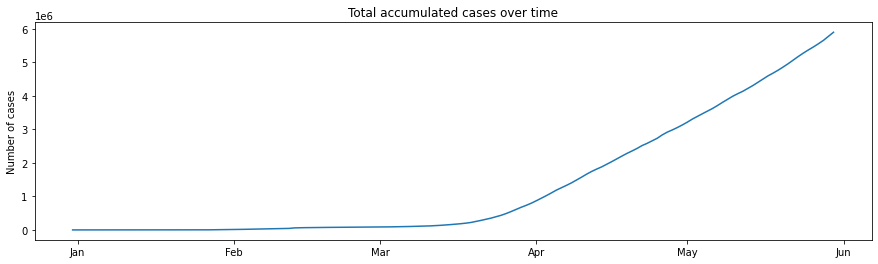

In [139]:
fig, ax = plt.subplots(figsize=(15,4))


ax.plot(df_temp.index, 'total_cases', data=df[df.loc[:,'location'] == 'World'])

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total accumulated cases over time')
plt.ylabel('Number of cases')
plt.show()

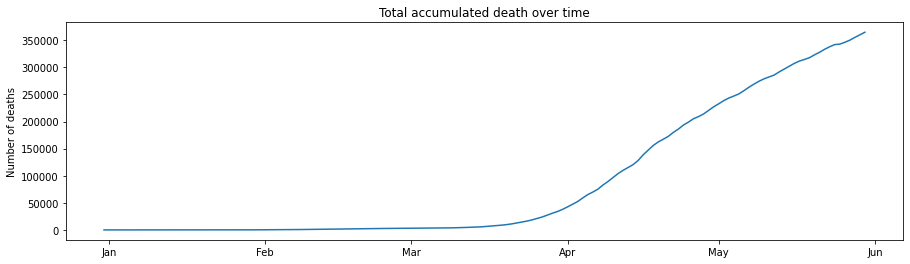

In [140]:
fig, ax = plt.subplots(figsize=(15,4))


ax.plot(df_temp.index, 'total_deaths', data=df[df.loc[:,'location'] == 'World'])

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total accumulated death over time')
plt.ylabel('Number of deaths')
plt.show()

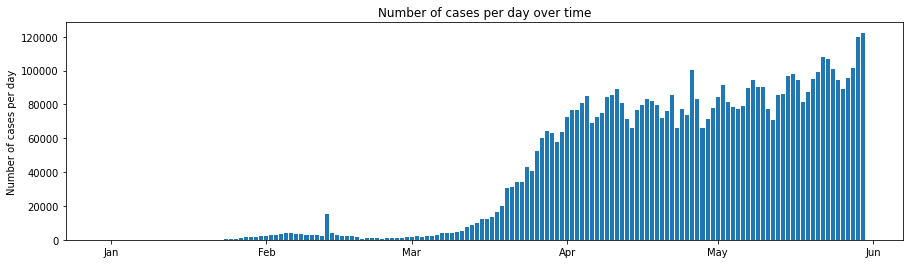

In [141]:
fig, ax = plt.subplots(figsize=(15,4))


ax.bar(df_temp.index, 'new_cases', data=df[df.loc[:,'location'] == 'World'])

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of cases per day over time')
plt.ylabel('Number of cases per day')
plt.show()

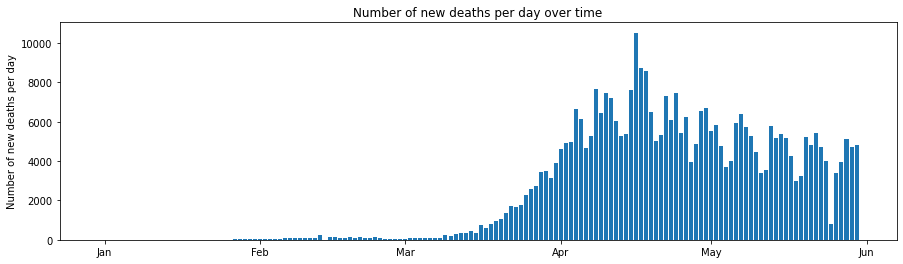

In [142]:
fig, ax = plt.subplots(figsize=(15,4))


ax.bar(df_temp.index, 'new_deaths', data=df[df.loc[:,'location'] == 'World'])

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new deaths per day over time')
plt.ylabel('Number of new deaths per day')
plt.show()

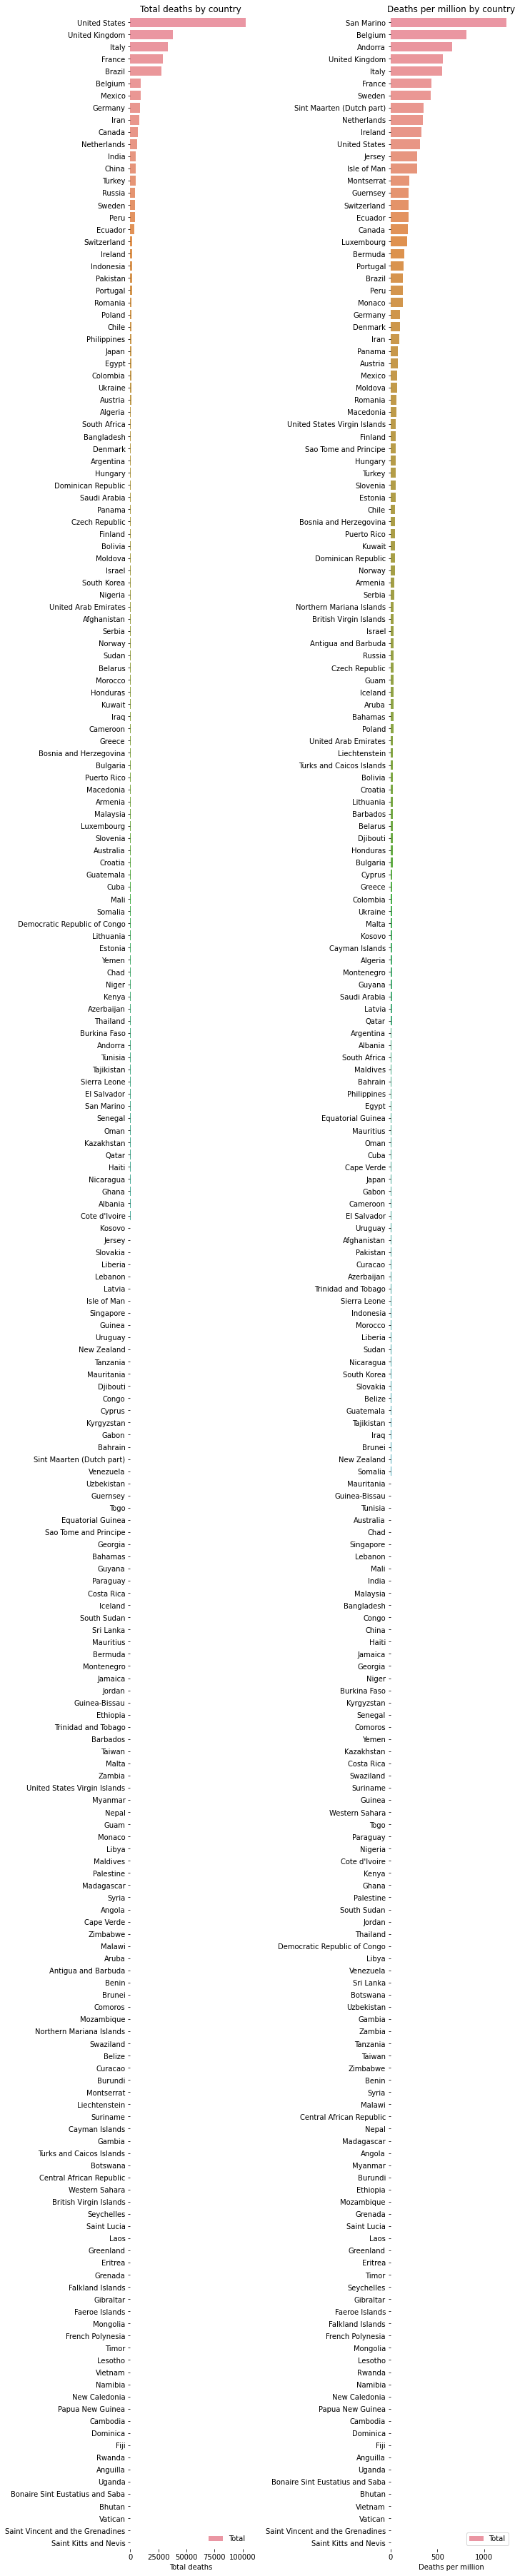

In [143]:
# Initialize the matplotlib figure
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,50), constrained_layout=True)

# Plot the total crashes
sns.barplot(x="total_deaths", y="location", data=df_latest_date.sort_values(by='total_deaths',ascending=False),
            label="Total", ax=ax[0])

# Add a legend and informative axis label
ax[0].legend(ncol=2, loc="lower right", frameon=False)
ax[0].set(ylabel="",
       xlabel="Total deaths", title='Total deaths by country')
sns.despine(left=True, bottom=True)

# Plot the total crashes
sns.barplot(x="total_deaths_per_million", y="location", data=df_latest_date.sort_values(by='total_deaths_per_million',ascending=False),
            label="Total", ax=ax[1])

#Add a legend and informative axis label
ax[1].legend(ncol=2, loc="lower right", frameon=True)
ax[1].set(ylabel="",
      xlabel="Deaths per million", title='Deaths per million by country')
sns.despine(left=True, bottom=True)

<h2> 2. Comparison of Global Numbers with Sweden </h2>
Secondly, I compare the global numbers with the Swedish numbers.

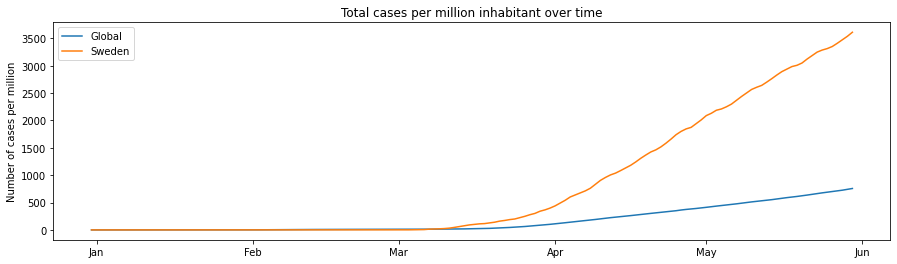

In [144]:
fig, ax = plt.subplots(figsize=(15,4))

ax.plot(df_temp.index, 'total_cases_per_million', data=df[df.loc[:,'location'] == 'World'], label = 'Global')
ax.plot(df_temp.index, 'total_cases_per_million', data=df[df.loc[:,'location'] == 'Sweden'], label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total cases per million inhabitant over time')
plt.ylabel('Number of cases per million')
plt.legend()
plt.show()

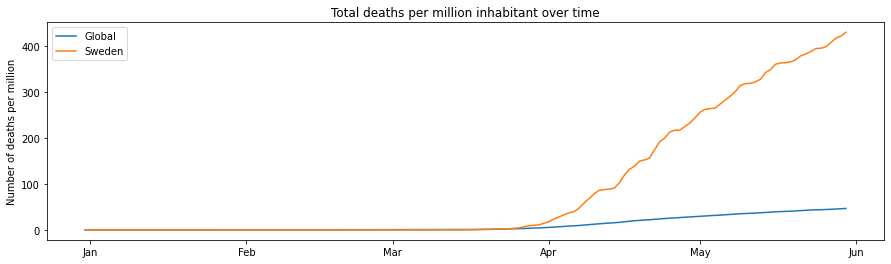

In [145]:
fig, ax = plt.subplots(figsize=(15,4))

ax.plot(df_temp.index, 'total_deaths_per_million', data=df[df.loc[:,'location'] == 'World'], label = 'Global')
ax.plot(df_temp.index, 'total_deaths_per_million', data=df[df.loc[:,'location'] == 'Sweden'], label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total deaths per million inhabitant over time')
plt.ylabel('Number of deaths per million')
plt.legend()
plt.show()

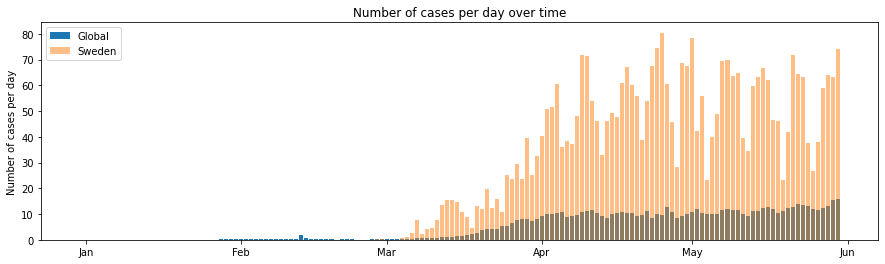

In [146]:
fig, ax = plt.subplots(figsize=(15,4))

ax.bar(df_temp.index, 'new_cases_per_million', data=df[df.loc[:,'location'] == 'World'], label = 'Global')
ax.bar(df_temp.index, 'new_cases_per_million', data=df[df.loc[:,'location'] == 'Sweden'], label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of cases per day over time')
plt.ylabel('Number of cases per day')
plt.legend()
plt.show()

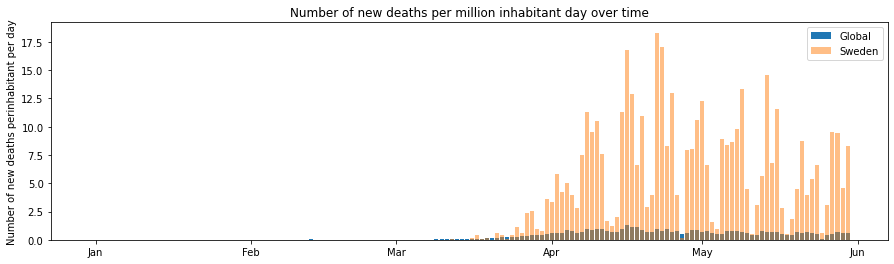

In [147]:
fig, ax = plt.subplots(figsize=(15,4))

ax.bar(df_temp.index, 'new_deaths_per_million', data=df[df.loc[:,'location'] == 'World'], label = 'Global')
ax.bar(df_temp.index, 'new_deaths_per_million', data=df[df.loc[:,'location'] == 'Sweden'], label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new deaths per million inhabitant day over time')
plt.ylabel('Number of new deaths perinhabitant per day')
plt.legend()
plt.show()

Based on the presented charts we can clearly see Sweden has higher numbers on every analysis meaning, the covid situation in Sweden is significantly worse compared to the rest of the world on average. Nevertheless, my hypothesis is that the analysis is rather misleading since many countries have very few reported cases in relation to the population, e.g. China and India, hence I will compare the swedish numbers with the average of the countries constituting for 80% of the total number of cases.

<h2> 4. Compare Sweden with countries that have top 20 highest number of total cases

<h3> 4.1 Prepare data </h3>
First I need to prepare the additional data set

In [148]:
df_top_20_last_date = df_latest_date.sort_values(by = 'total_cases', ascending = False).head(20)
df_top_20 = df[df['location'].isin(df_top_20_last_date['location'])]

<h3> 4.2 Analysis </h3>

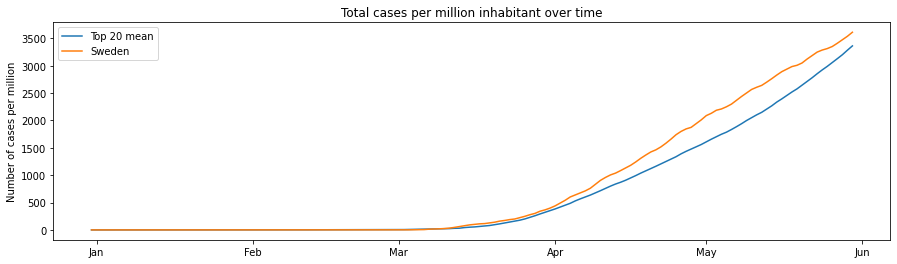

In [175]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.plot(df_top_20.groupby('date')['total_cases_per_million'].agg('mean'), label = 'Top 20 mean')
ax.plot(df_temp.index, 'total_cases_per_million', data=df_temp, label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total cases per million inhabitant over time')
plt.ylabel('Number of cases per million')
plt.legend()
plt.show()

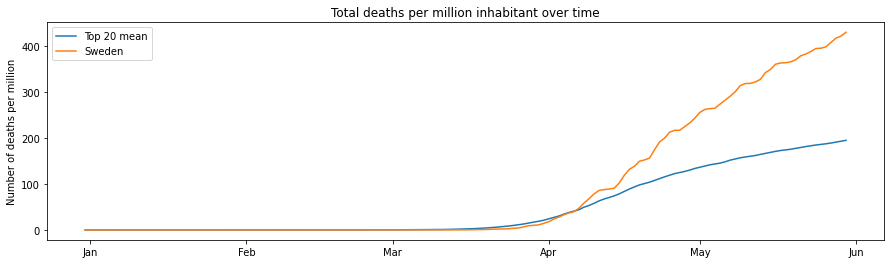

In [176]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.plot(df_top_20.groupby('date')['total_deaths_per_million'].agg('mean'), label = 'Top 20 mean')
ax.plot(df_temp.index, 'total_deaths_per_million', data=df_temp, label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total deaths per million inhabitant over time')
plt.ylabel('Number of deaths per million')
plt.legend()
plt.show()

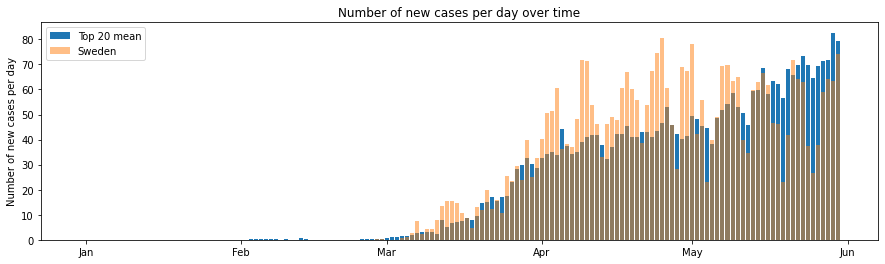

In [199]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.bar(df_temp.index, df_top_20.groupby('date')['new_cases_per_million'].agg('mean'), label = 'Top 20 mean')
ax.bar(df_temp.index, 'new_cases_per_million', data=df_temp, label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new cases per day over time')
plt.ylabel('Number of new cases per day')
plt.legend()
plt.show()

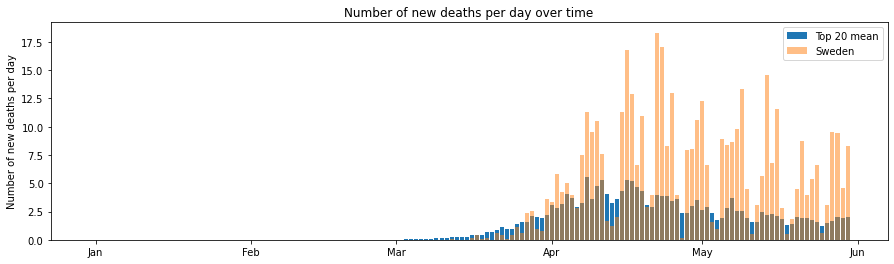

In [198]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.bar(df_temp.index, df_top_20.groupby('date')['new_deaths_per_million'].agg('mean'), label = 'Top 20 mean')
ax.bar(df_temp.index, 'new_deaths_per_million', data=df_temp, label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new deaths per day over time')
plt.ylabel('Number of new deaths per day')
plt.legend()
plt.show()

Comparing the swedish and global top 20 numbers there is a clear mismatch in terms of growth of total cases vs total deaths. The growth of total cases per million inhabitant is pretty much the same. However, when looking at deaths, it is clear that Sweden has suffered a much larger growth in total number of deaths per million inhabitant.

Looking at the number of new deaths and cases the same pattern can be resembled. The new number of cases per day follow each other quite good. Nevertheless, we can see a flattening of the curve for the top 20 countries in April, whereas Sweden still rising. This is most likely to many countries taking measures of implementing lockdowns. From mid-may and forward we can see that the daily new cases seem to rise globally whereas they stagnant in Sweden. This is likely due to 2 reasons:
1. Countries with lockdowns starting to open up
2. Countries lagging after starting to get a larger number of cases, like Brazil and USA

Looking at the new number of deaths per day we can see Sweden is above the top 20 average almost exclusively.

<h2> 5. Compare Sweden with Scandinavia

<h3> 5.1 Prepare data

In [201]:
df_scandinavia = df[df['location'].isin(['Denmark', 'Finland', 'Norway'])]

<h3> 5.2 Analysis

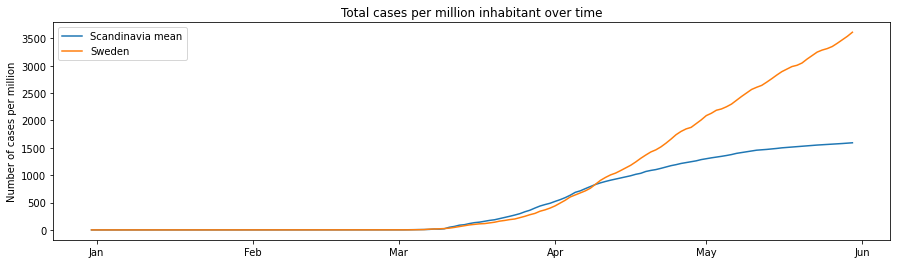

In [202]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.plot(df_scandinavia.groupby('date')['total_cases_per_million'].agg('mean'), label = 'Scandinavia mean')
ax.plot(df_temp.index, 'total_cases_per_million', data=df_temp, label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total cases per million inhabitant over time')
plt.ylabel('Number of cases per million')
plt.legend()
plt.show()

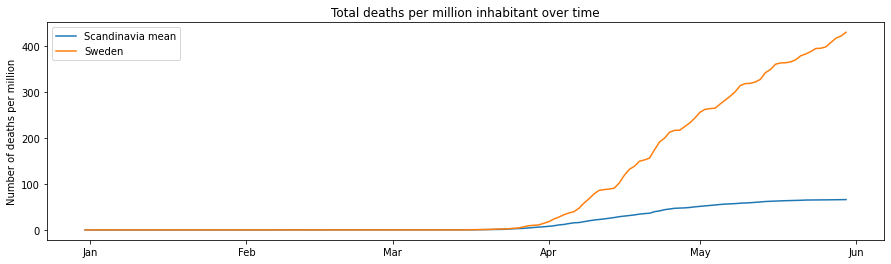

In [203]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.plot(df_scandinavia.groupby('date')['total_deaths_per_million'].agg('mean'), label = 'Scandinavia mean')
ax.plot(df_temp.index, 'total_deaths_per_million', data=df_temp, label = 'Sweden')

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Total deaths per million inhabitant over time')
plt.ylabel('Number of deaths per million')
plt.legend()
plt.show()

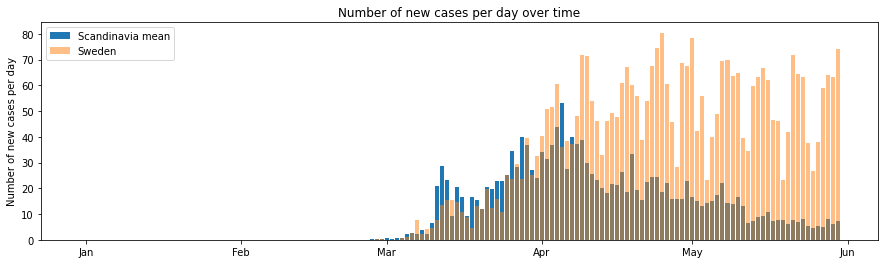

In [204]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.bar(df_temp.index, df_scandinavia.groupby('date')['new_cases_per_million'].agg('mean'), label = 'Scandinavia mean')
ax.bar(df_temp.index, 'new_cases_per_million', data=df_temp, label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new cases per day over time')
plt.ylabel('Number of new cases per day')
plt.legend()
plt.show()

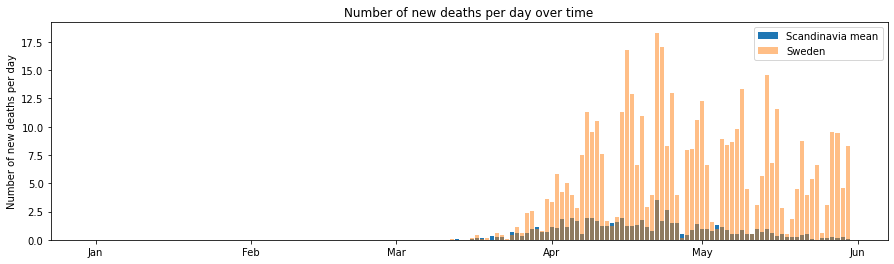

In [205]:
fig, ax = plt.subplots(figsize=(15,4))

df_temp = df[df.loc[:,'location'] == 'Sweden']
ax.bar(df_temp.index, df_scandinavia.groupby('date')['new_deaths_per_million'].agg('mean'), label = 'Scandinavia mean')
ax.bar(df_temp.index, 'new_deaths_per_million', data=df_temp, label = 'Sweden', alpha = 0.5)

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.title('Number of new deaths per day over time')
plt.ylabel('Number of new deaths per day')
plt.legend()
plt.show()

Comparing Sweden's sitation with the neighboring scandinavian countries, there is a clear difference in impact of Covid-19. The lockdowns in the neighboring countries have had a clear effect in both number of cases and deaths compared to Sweden where both numbers have risen. The recent opening of the scandinavian neighboring countries do not seem to have caused a second wave (yet). Even if the numbers have started to decrease in Sweden they are significantly higher in comparison to the rest of Scandinavia.

<h2> 3. Correlation analysis

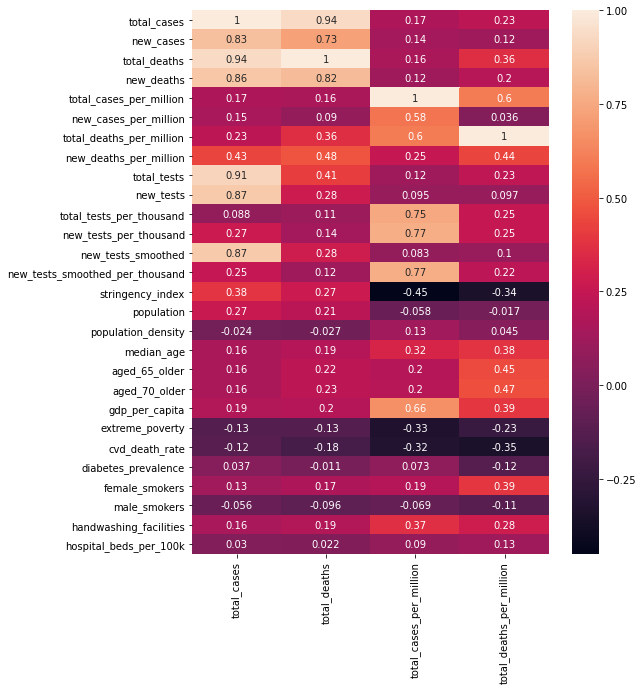

In [89]:
plt.figure(figsize=(8,10))
corr = pd.DataFrame(df_latest_date.corr())
corr = corr.loc[:,['total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million']]
sns.heatmap(corr, annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation by category with Total deaths per million')

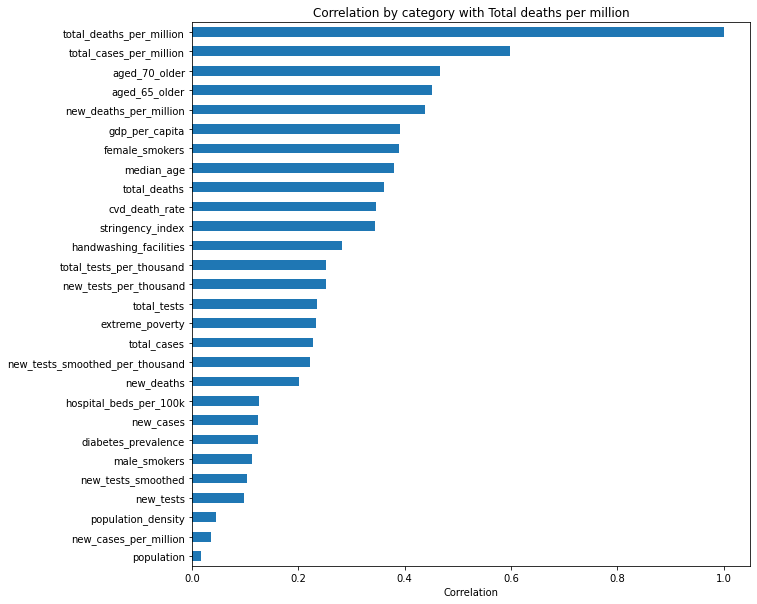

In [97]:
plt.figure(figsize=(10,10))
corr['total_deaths_per_million'].abs().sort_values(ascending = True).plot.barh()
plt.xlabel('Correlation')
plt.title('Correlation by category with Total deaths per million')

From the correlation analysis we can draw the following conclusions:
- Number of deaths and cases are strongly correlated with the number
- Large old populations seem to be the major reason for high number of deaths per million aside from the number of cases and deaths
- GDP is posetively correlated with number of deaths per million inhabitant. This is probably due to the large spread in developing countries in Europe since there are higher number of cases there. And not necessarily meaning that higher GDP means higher risk of dying.